In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('Palm_Features.xlsx')

In [3]:
df.head()

,Image_Name,Hb Value,Gender,Age,Height,Weight,Mean_Red,Mean_Green,Mean_Blue,Mean_R-G,...,Brightness,Entropy,Mean_L,Mean_A,Mean_B,Mean_G1,Mean_G2,Mean_G3,Mean_G4,Mean_G5
0,1709617238375.jpg,11.5,1,63,150.0,42,171.058029,95.746063,79.132751,75.492599,...,115.143901,3.374992,124.489388,157.329834,151.398407,28.911028,21.559870,0.550662,12.050771,117.798874
1,1709617534838.jpg,11.6,0,63,155.0,55,177.839264,108.628555,91.947807,69.681519,...,126.185754,3.122405,134.675903,154.165115,149.248245,11.130719,8.395287,0.627475,4.990907,128.604538
2,1709618528581.jpg,11.1,1,50,151.0,45,164.460495,98.395569,86.722511,66.425880,...,115.146662,2.334258,123.541016,153.985092,146.616867,34.409153,23.362341,0.698524,13.612711,118.539879
3,1709619358067.jpg,12.1,1,42,155.0,45,151.329605,101.981934,96.311028,49.792988,...,115.088051,3.436739,120.985947,147.450485,139.969818,21.074440,15.596459,0.568201,9.252064,117.174530
4,1709619811692.jpg,12.2,1,76,148.0,60,183.594070,139.553665,137.314484,45.124718,...,150.919077,2.992105,157.727432,145.054489,136.321976,22.289700,17.030174,0.774384,9.076474,154.067825


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image_Name       418 non-null    object 
 1   Hb Value         418 non-null    float64
 2   Gender           418 non-null    int64  
 3   Age              418 non-null    int64  
 4   Height           418 non-null    float64
 5   Weight           418 non-null    int64  
 6   Mean_Red         418 non-null    float64
 7   Mean_Green       418 non-null    float64
 8   Mean_Blue        418 non-null    float64
 9   Mean_R-G         418 non-null    float64
 10  Erythema_Index   418 non-null    float64
 11  Mean_Hue         418 non-null    float64
 12  Mean_Saturation  418 non-null    float64
 13  Mean_Value       418 non-null    float64
 14  High_Hue_Ratio   418 non-null    float64
 15  Brightness       418 non-null    float64
 16  Entropy          418 non-null    float64
 17  Mean_L          

In [5]:
df.isnull().sum()

Image_Name         0
Hb Value           0
Gender             0
Age                0
Height             0
Weight             0
Mean_Red           0
Mean_Green         0
Mean_Blue          0
Mean_R-G           0
Erythema_Index     0
Mean_Hue           0
Mean_Saturation    0
Mean_Value         0
High_Hue_Ratio     0
Brightness         0
Entropy            0
Mean_L             0
Mean_A             0
Mean_B             0
Mean_G1            0
Mean_G2            0
Mean_G3            0
Mean_G4            0
Mean_G5            0
dtype: int64

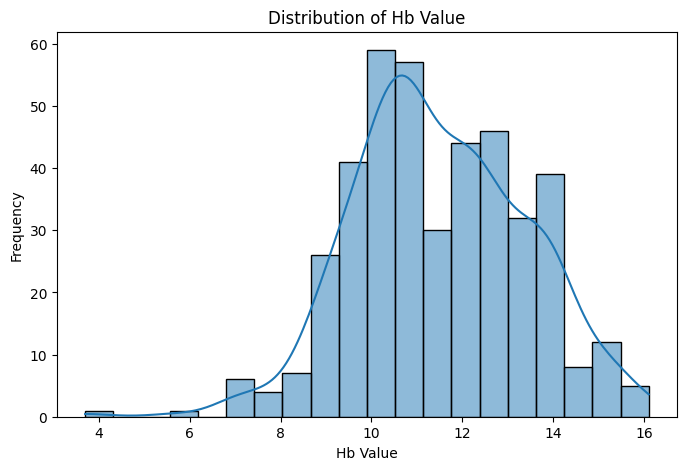

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Hb Value"], kde=True, bins=20)
plt.title("Distribution of Hb Value")
plt.xlabel("Hb Value")
plt.ylabel("Frequency")
plt.show()

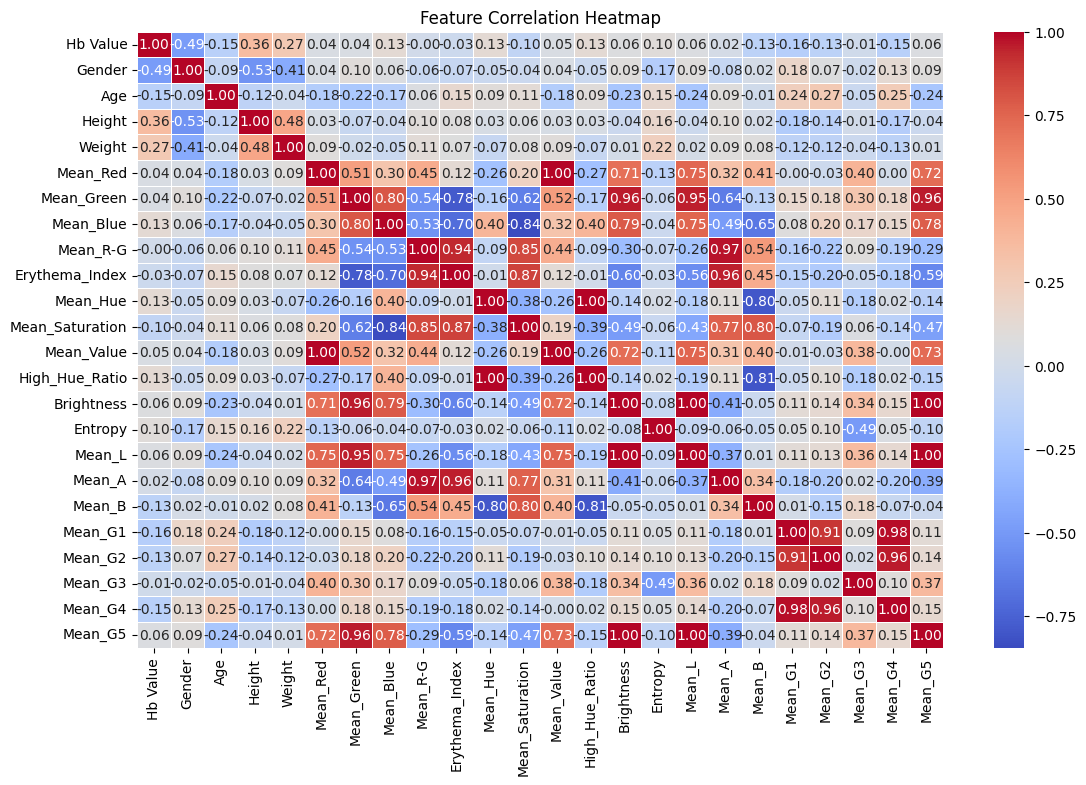

In [7]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


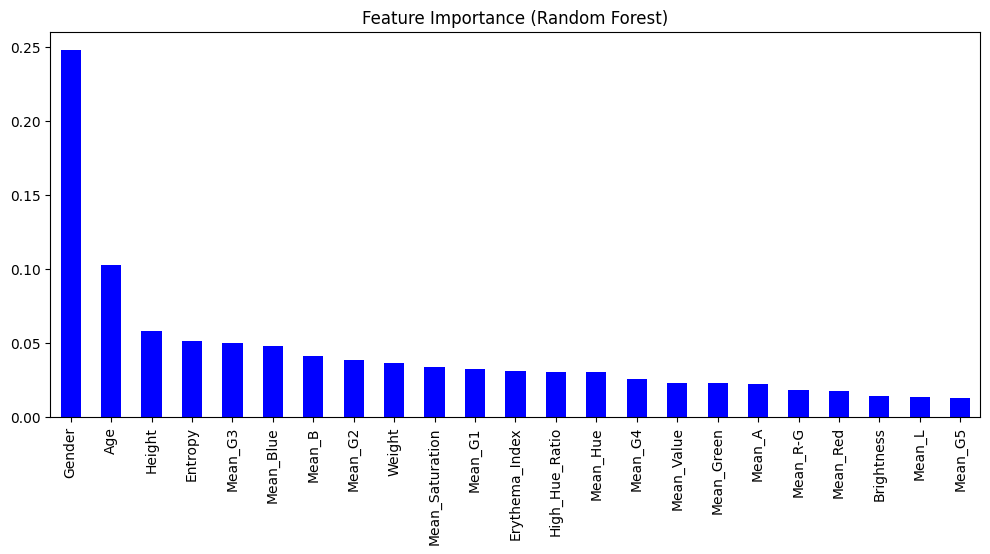

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Define X (features) and Y (target)
X = df.drop(columns=["Image_Name", "Hb Value"])
y = df["Hb Value"]

# Train a basic model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 5), color="blue")
plt.title("Feature Importance (Random Forest)")
plt.show()


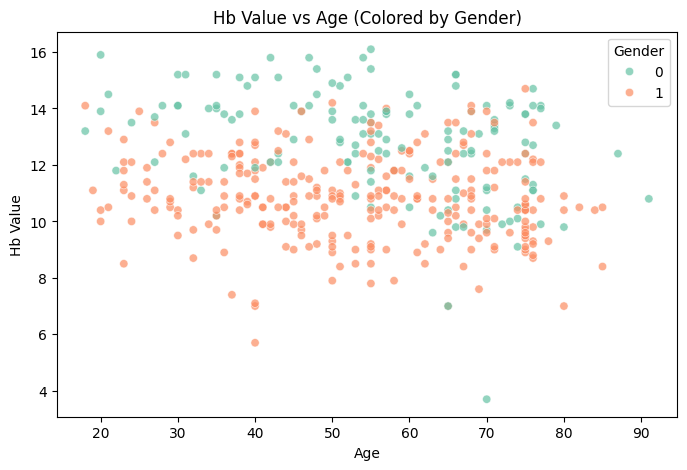

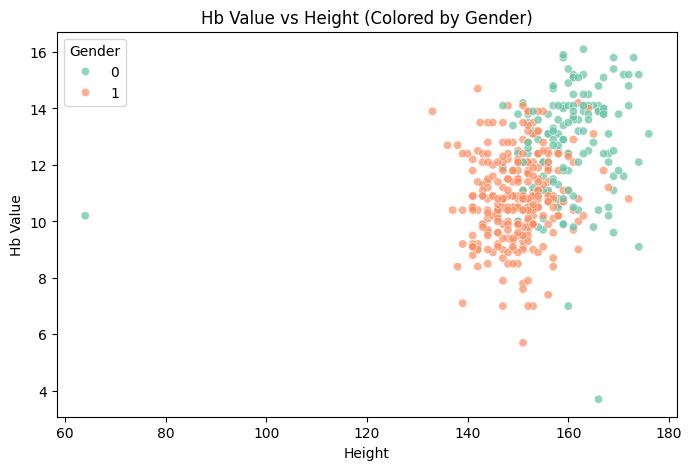

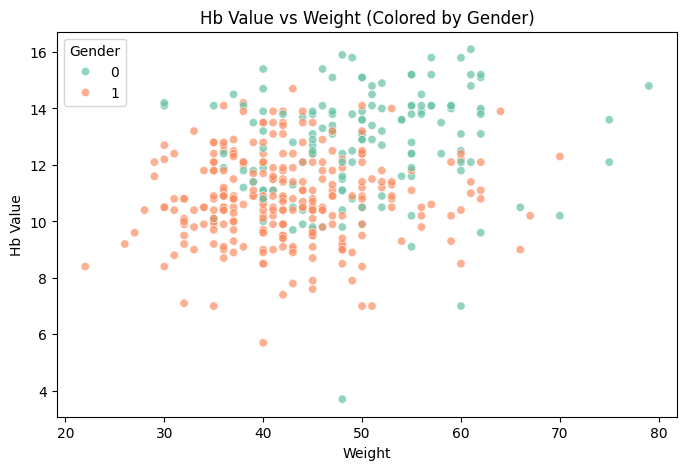

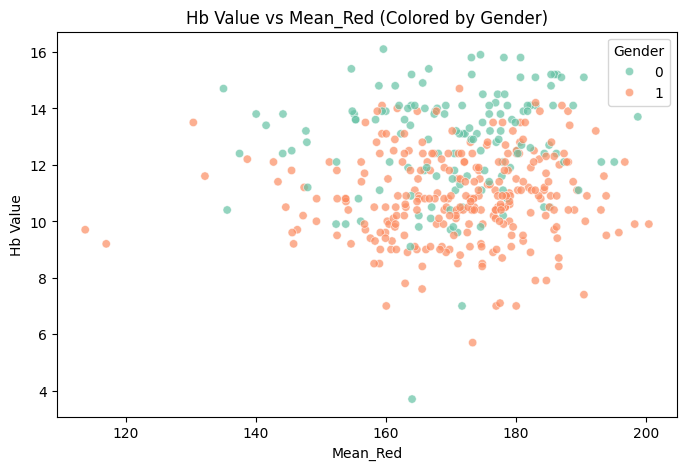

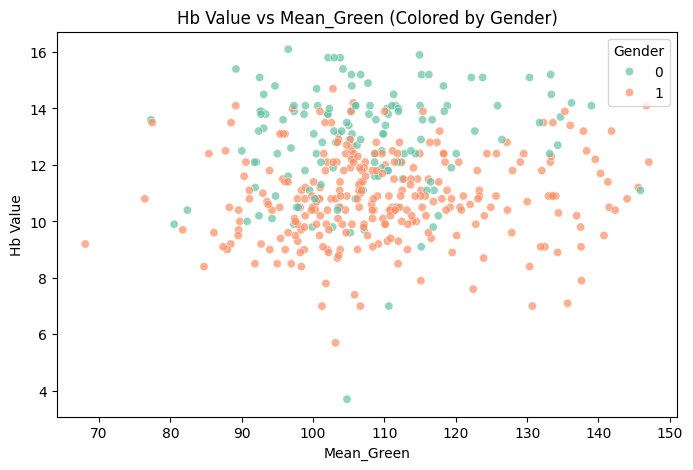

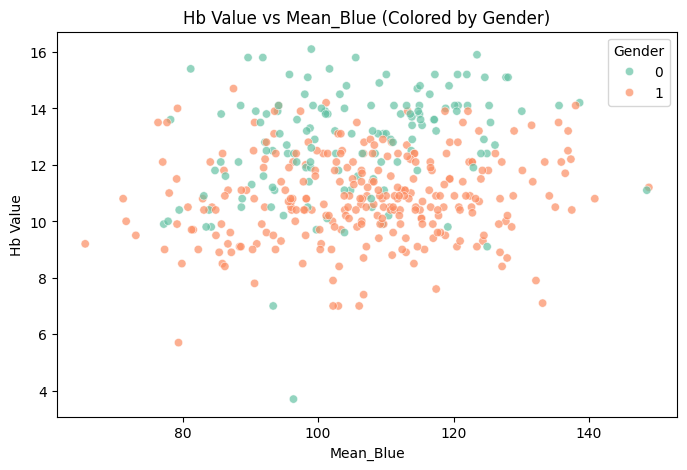

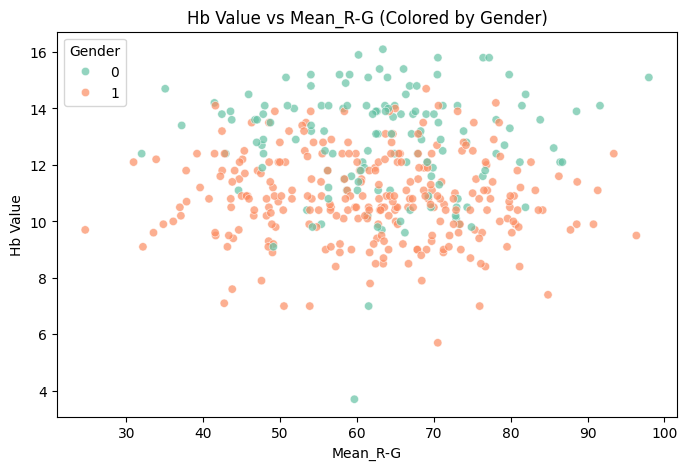

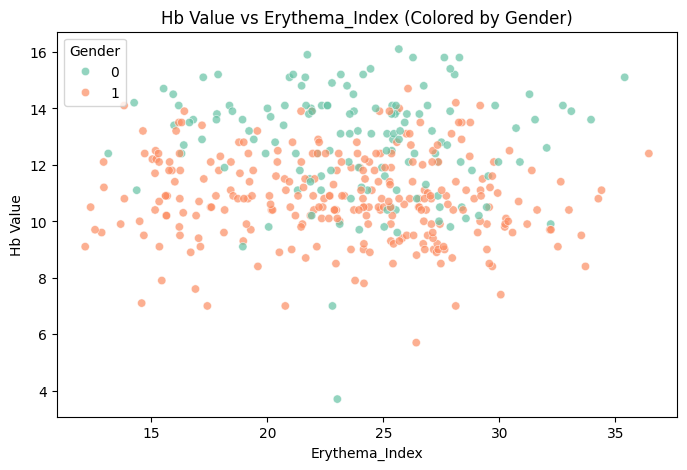

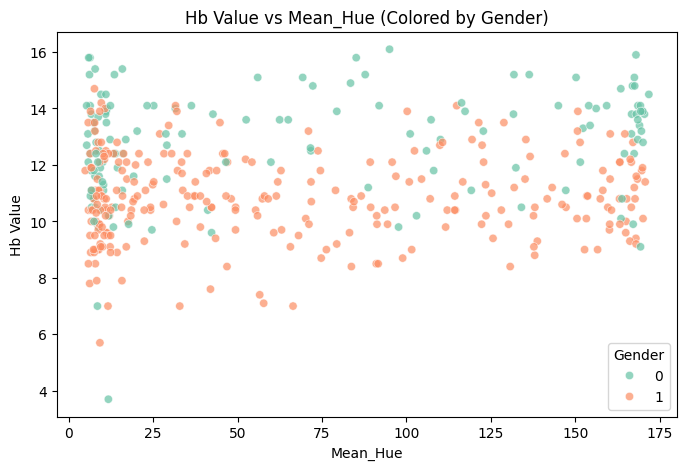

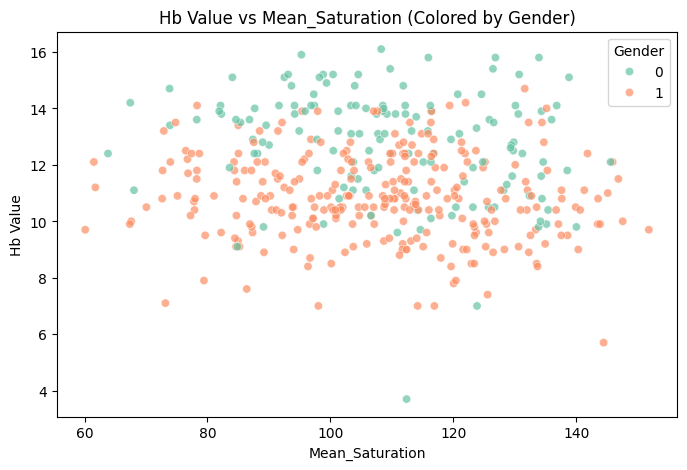

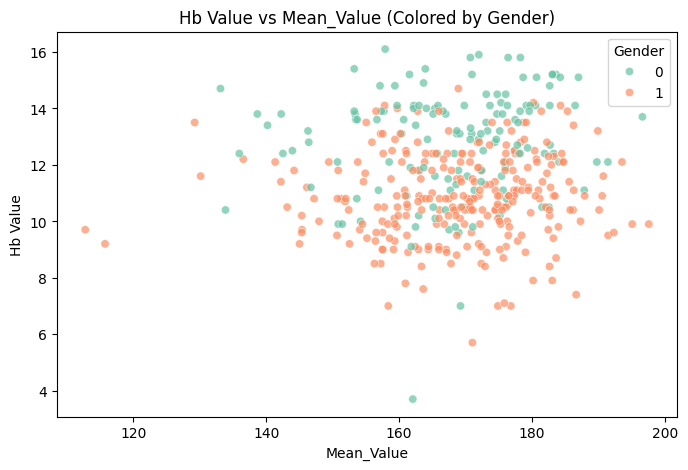

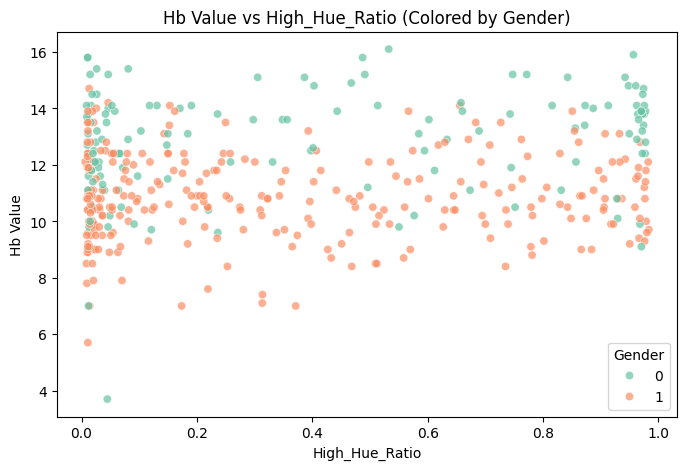

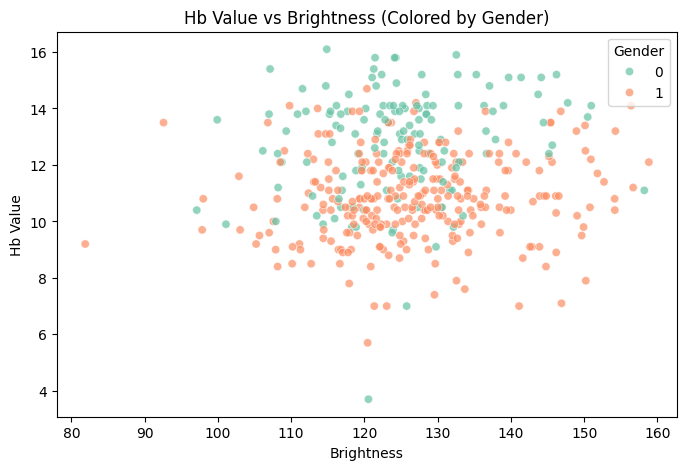

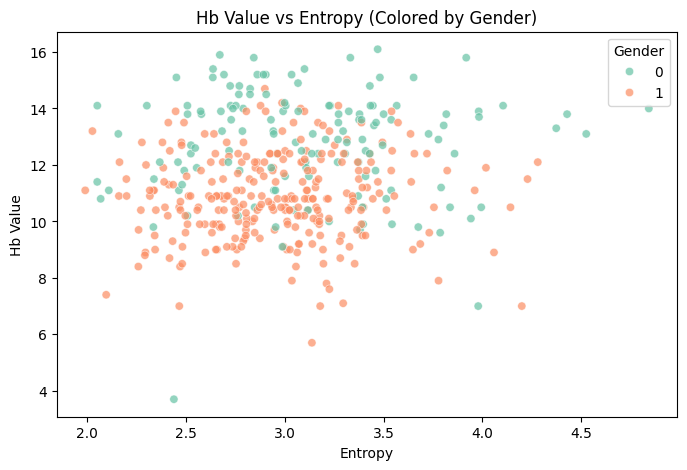

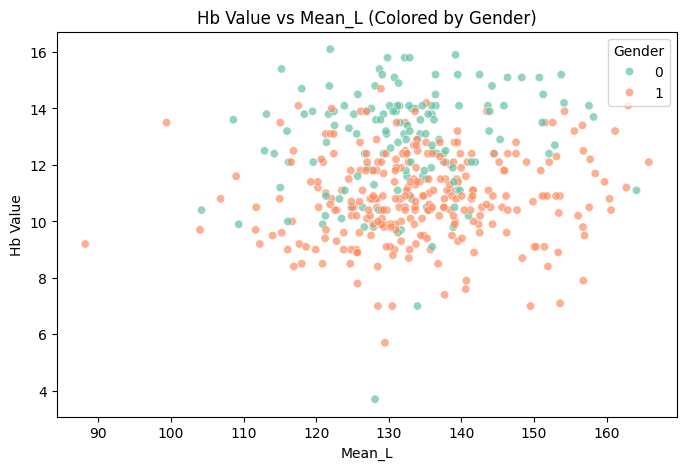

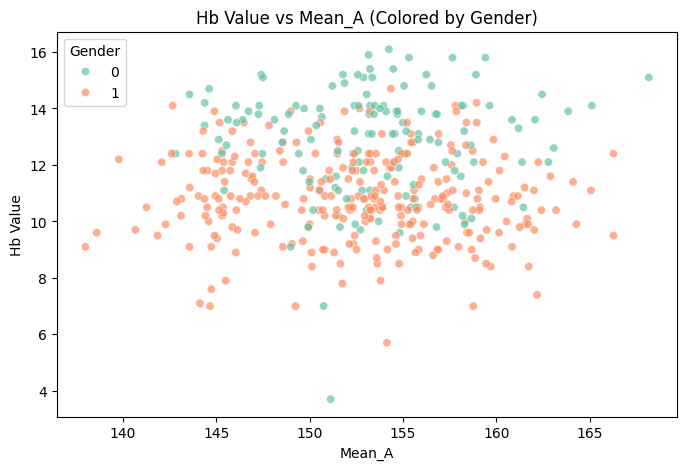

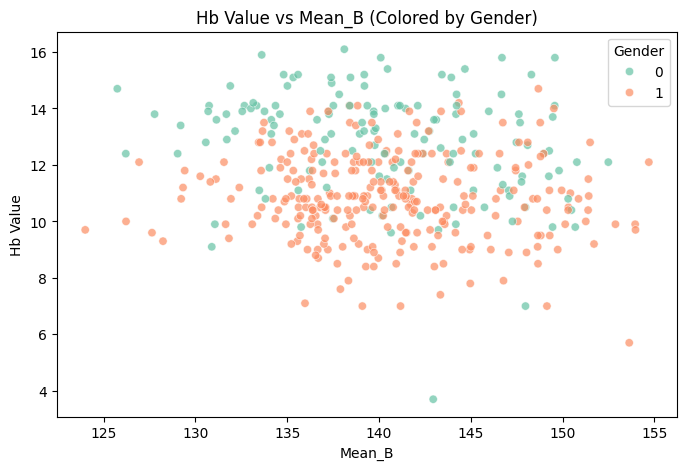

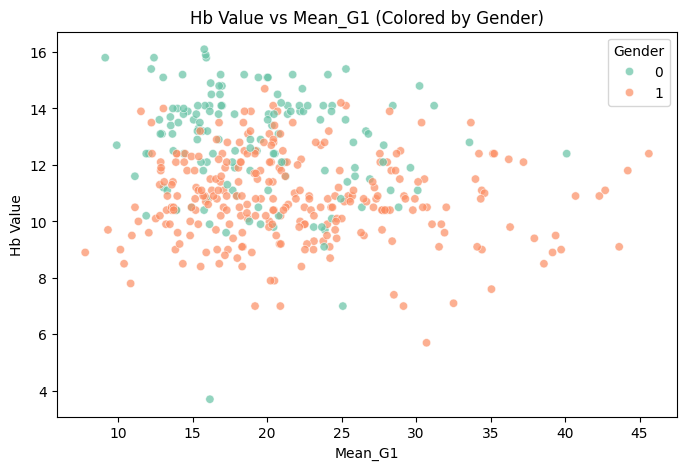

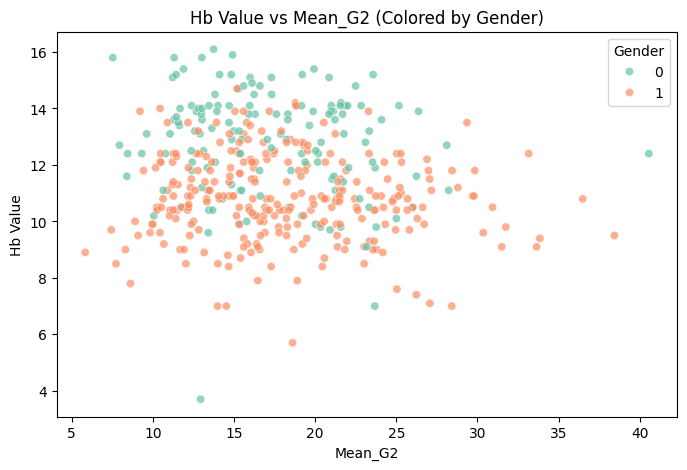

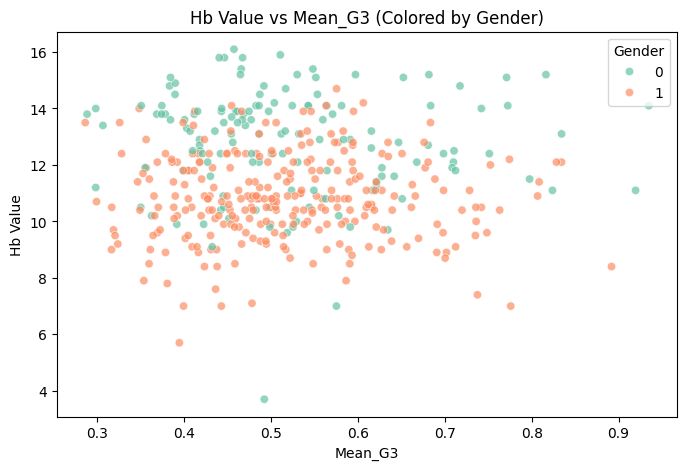

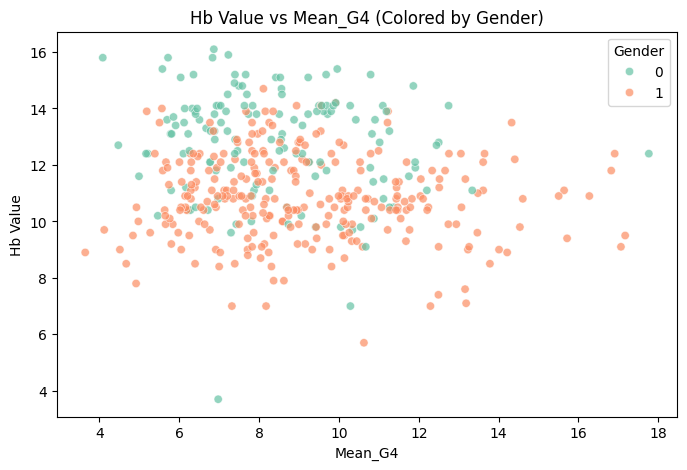

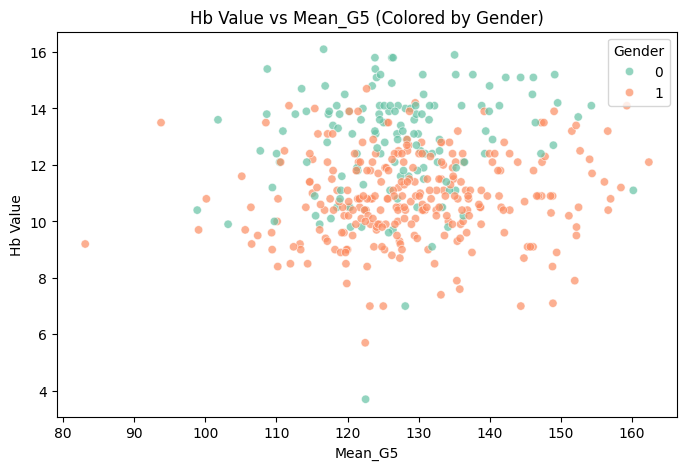

In [9]:
# Drop non-numeric columns
features = df.drop(columns=["Image_Name", "Hb Value", "Gender"]).columns  # Exclude Gender from feature list

# Generate individual plots
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["Hb Value"], hue=df["Gender"], palette="Set2", alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Hb Value")
    plt.title(f"Hb Value vs {feature} (Colored by Gender)")
    plt.legend(title="Gender")
    plt.show()  # Show each plot separately